In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('all_songs.csv')
print(df.columns)
df.head()

Index(['track_name', 'track_id', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'key', 'mode', 'time_signature'],
      dtype='object')


C:\Users\lukas\AppData\Local\Temp\ipykernel_15144\3327604312.py:1: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('all_songs.csv')


,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature
0,Prece a Iansã,5f74voxOH9UIgMmdIB5Sxk,2,0.9050,0.907,178013,0.623,0.407000,0.2760,-10.502,0.1770,125.658,0.902,G,Minor,4/4
1,Na Congo To Salakala,1JUtRzUVINB4PWYkiLF1do,0,0.8320,0.643,78000,0.101,0.000000,0.1820,-16.933,0.1290,156.946,0.623,C,Major,4/4
2,It Must Be Love,25gtHkSLEjoioXqmoGTK10,0,0.6590,0.496,152600,0.618,0.000011,0.0711,-7.356,0.0342,78.071,0.960,D#,Major,4/4
3,Mister Boogie (Honky Tonk Train Blues),2BBHhUKbo3VxUJdQxLpyNd,1,0.5610,0.866,137578,0.902,0.000002,0.0556,-8.005,0.0722,137.447,0.937,F,Major,4/4
4,Cages,1FiXVMLHXmf3uPrGEzabyk,0,0.0497,0.210,319359,0.452,0.804000,0.0953,-17.386,0.0508,177.853,0.342,D,Major,4/4


In [4]:
df = df.dropna()
df = df[df.time_signature != "0/4"][df.time_signature != "1/4"]
df = df.sort_values(by="popularity", ascending=False).drop_duplicates('track_id', keep='first')

In [5]:
key_conversion = {"C": 0, "C#": 1, "D": 2, "D#": 3, "E": 4, "F": 5, "F#": 6, "G": 7, "G#": 8, "A": 9, "A#": 10, "B": 11}
mode_conversion = {"Major": 1, "Minor": 0}
time_signature_conversion = {"3/4": 3, "4/4": 4, "5/4": 5, "6/4": 6, "7/4": 7}

df["key"].replace(key_conversion, inplace=True)
df["mode"].replace(mode_conversion, inplace=True)
df["time_signature"].replace(time_signature_conversion, inplace=True)
df["key"] = df["key"].astype(int)
df["mode"] = df["mode"].astype(int)
df["time_signature"] = df["time_signature"].astype(float)

C:\Users\lukas\AppData\Local\Temp\ipykernel_15144\1710211303.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["key"].replace(key_conversion, inplace=True)
C:\Users\lukas\AppData\Local\Temp\ipykernel_15144\1710211303.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [6]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "key", "mode", "time_signature"]

In [8]:
df = pd.concat([df[df.popularity == 0].sample(frac=0.2), df[df.popularity != 0]])

sampling_parameter 0.24313149677914378		4004
sampling_parameter 0.2985900229117585		3666
sampling_parameter 0.41828715834328667		3173
sampling_parameter 0.5221809596471154		2885
sampling_parameter 0.6064916645985712		2706
sampling_parameter 0.6940449283837454		2554
sampling_parameter 0.8130821396854008		2386
sampling_parameter 0.8073165480373306		2393
sampling_parameter 0.844332816609814		2348
sampling_parameter 0.8691998758055427		2319
sampling_parameter 0.8403195762480259		2352
sampling_parameter 0.8685166320567625		2319
sampling_parameter 0.8973988960489756		2287
sampling_parameter 0.8971526333399422		2287
sampling_parameter 0.9479446868173498		2234
sampling_parameter 0.9393173677736593		2243
sampling_parameter 0.9854031768057898		2197
sampling_parameter 0.993522350596939		2189
sampling_parameter 0.9966885980682799		2186
sampling_parameter 0.9768374373175206		2205
sampling_parameter 0.9504856084858658		2231
sampling_parameter 0.9008638976373537		2283
sampling_parameter 0.87125746382

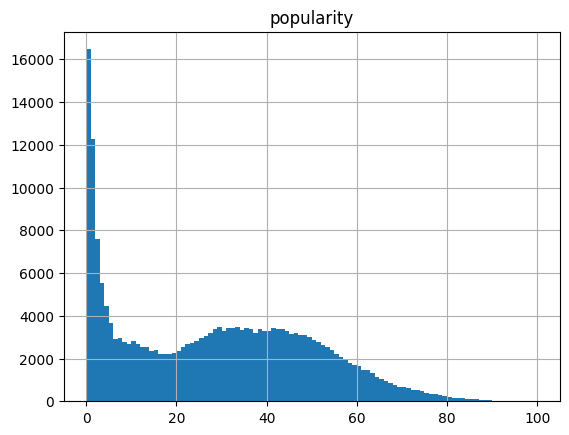

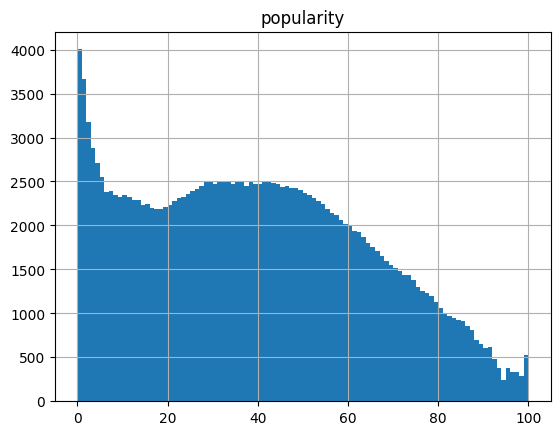

In [9]:
# Undersample train_df

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import math

train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)

df_binned = []

average_samples_per_bin = train_df['popularity'].value_counts().mean()

for label in range(0, 101):
    df_label = train_df[train_df['popularity']==label]
    if len(df_label) == 0:
        continue
    # the sampling parameter should be dynamically calculated based on the number of samples in each bin. However, the overrepreseted bins should still be slightly oversampled and vice versa
    # Calculate adaptive sampling factor: the ratio of the average_samples_per_bin to the current label count
    # Add 1 to prevent division by zero, and take logarithm to "squeeze" the values together

    sampling_parameter = np.power(average_samples_per_bin / (len(df_label) + 1), 0.7)
    print("sampling_parameter", sampling_parameter, end="\t\t")

    # Calculate resample size. We make sure it is at least the size of the original bin to prevent undersampling.
    # resample_size = max(len(df_label), int(sampling_parameter * len(df_label)))
    resample_size = max(1, int(sampling_parameter * len(df_label)))
    # resample_size = max(1, resample_size)
    print(resample_size)
    df_label_resampled = resample(df_label, replace=True, n_samples=resample_size, random_state=1)  # oversample each bin to 200
    df_binned.append(df_label_resampled)

df_resampled = pd.concat(df_binned)

train_df.hist("popularity", bins=100)
# plt.yscale('log')
plt.show()
df_resampled.hist("popularity", bins=100)
# plt.yscale('log')
plt.show()

train_df = df_resampled

In [10]:
x_train = train_df[features].sort_index(axis=1)
x_test = test_df[features].sort_index(axis=1)
y_train = train_df["popularity"]
y_test = test_df["popularity"]

x_mean = x_train.mean()
x_std = x_train.std()

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [11]:
import pickle

dataframes = {"x_mean": x_mean, "x_std": x_std}
with open('normalization.pkl', 'wb') as f:
    pickle.dump(dataframes, f)

In [12]:
with open('normalization.pkl', 'rb') as f:
    dataframes = pickle.load(f)
x_mean = dataframes["x_mean"]
x_std = dataframes["x_std"]

In [13]:
len(x_train), len(x_test)

(190382, 55162)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense, Add, Activation, BatchNormalization, Dropout
from keras import backend as K
import math
from keras.regularizers import l2

model = LinearRegression()
model.fit(x_train[:], y_train[:])

y_pred = model.predict(x_test)

print(math.sqrt(mean_squared_error(y_test, y_pred)))

22.399197231044592


In [30]:
hidden_layer_sizes = [128]
residual_counts = [4]

best_mse = float('inf')
best_hl_size = 0
best_rl_count = 0

results = []

def lr_scheduler(epoch, lr):
    if epoch < 20:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

def residual_block(x, units):
    shortcut = x
    x = Dense(units, activation=None, kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(units, activation=None, kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

for hl_size in hidden_layer_sizes:
    for rl_count in residual_counts:
        inputs = Input(shape=(len(features),))
        x = Dense(hl_size, activation='relu', kernel_regularizer=l2(0.01))(inputs)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Dropout(0.1)(x)

        for _ in range(rl_count):
            x = residual_block(x, hl_size)
            x = Dropout(0.1)(x)

        outputs = Dense(1, kernel_regularizer=l2(0.01))(x)
        model = Model(inputs=inputs, outputs=outputs)
        optimizer = tf.keras.optimizers.Adam(1e-3)
        model.compile(optimizer=optimizer, loss='mse')

        lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

        history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), callbacks=[lr_callback])

        mse = min(history.history['val_loss'])
        mse_train = min(history.history['loss'])

        results.append((hl_size, rl_count, mse_train, mse))

        if mse < best_mse:
            best_mse = mse
            best_hl_size = hl_size
            best_rl_count = rl_count

# Display the results in a table
results_df = pd.DataFrame(results, columns=["Hidden Layer Size", "Residual Layer Count", "MSE_train", "MSE_test"])
results_df["RMSE_train"] = results_df["MSE_train"].apply(lambda x: math.sqrt(x))
results_df["RMSE_test"] = results_df["MSE_test"].apply(lambda x: math.sqrt(x))

print(f"Best Hidden Layer Size = {best_hl_size}, Best Residual Layer Count = {best_rl_count}, Best MSE = {best_mse}, which is RMSE = {math.sqrt(best_mse)}")
results_df

Epoch 1/25
5950/5950 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 574.5646 - val_loss: 459.3474 - learning_rate: 0.0010
Epoch 2/25
5950/5950 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 468.3975 - val_loss: 436.5362 - learning_rate: 0.0010
Epoch 3/25
5950/5950 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 457.9247 - val_loss: 442.5119 - learning_rate: 0.0010
Epoch 4/25
5950/5950 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 451.9836 - val_loss: 418.0470 - learning_rate: 0.0010
Epoch 5/25
5950/5950 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 444.7866 - val_loss: 452.0240 - learning_rate: 0.0010
Epoch 6/25
5950/5950 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 442.4594 - val_loss: 438.7431 - learning_rate: 0.0010
Epoch 7/25
5950/5950 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 441.4441 - val_loss: 441.8334 - learning_rate: 0.0010
Epoch 8/25
5950/5950 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 435.9781 - val_loss: 419.4856 - learning_rate: 0.0010
Epoch 9/25
5950/5950 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 4

,Hidden Layer Size,Residual Layer Count,MSE_train,MSE_test,RMSE_train,RMSE_test
0,128,4,411.4021,418.046997,20.28305,20.446198


1724/1724 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


(array([  1.,   0.,   0.,   0.,   0.,   2.,   2.,   1.,   1.,   1.,   0.,
          1.,   1.,   1.,   4.,   3.,   4.,   2.,   5.,   6.,   5.,   7.,
          6.,  10.,   6.,  16.,  10.,  13.,   9.,  17.,  21.,  23.,  23.,
         26.,  37.,  39.,  45.,  61.,  49.,  58.,  59.,  68.,  84.,  90.,
         76.,  94., 101., 129., 107., 140., 146., 175., 175., 196., 210.,
        209., 248., 247., 252., 290., 340., 326., 366., 362., 364., 431.,
        443., 443., 508., 507., 492., 547., 572., 596., 626., 669., 691.,
        701., 729., 707., 704., 750., 769., 727., 774., 779., 766., 752.,
        755., 866., 794., 799., 784., 745., 754., 778., 755., 702., 711.,
        697., 681., 718., 681., 707., 694., 678., 692., 643., 601., 667.,
        654., 634., 707., 700., 704., 697., 689., 679., 650., 653., 628.,
        640., 621., 572., 621., 581., 553., 564., 569., 531., 483., 441.,
        422., 427., 404., 325., 325., 267., 256., 243., 211., 202., 205.,
        168., 141., 132., 126., 137., 

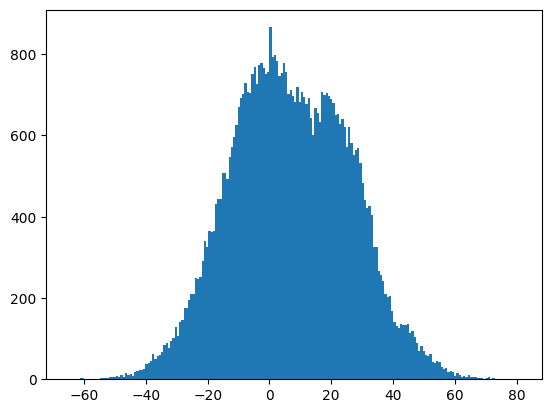

In [31]:
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()

diff = y_pred - y_test
plt.hist(diff, bins=200)

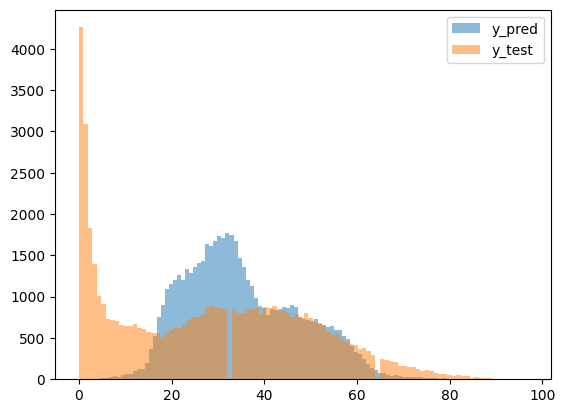

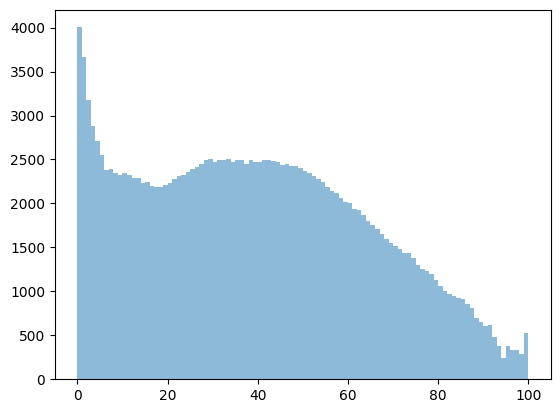

In [33]:
# plt.hist(y_pred, bins=100)
# # make another plot and show the train data plot as a separate plot to the right
# make two plots (hists) the first one should show y_pred, the second one y_test
plt.hist(y_pred, bins=100, alpha=0.5, label='y_pred')
plt.hist(y_test, bins=100, alpha=0.5, label='y_test')
plt.legend()
plt.show()
plt.hist(y_train, bins=100, alpha=0.5, label='y_pred')
# plt.hist(y_test, bins=100, alpha=0.5, label='y_test')
plt.show()

In [35]:
save = False
if save:
    model.save('model.keras')
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()

    with open('model.tflite', 'wb') as f:
        f.write(tflite_model)
        print("done")